In [10]:
import tidyverse as tv
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Initialize SymPy printing for nice output
# sp.init_printing()
# To initialize a sympy session with common imports
from sympy import init_session
sp.init_session()


IPython console for SymPy 1.14.0 (Python 3.13.7-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.14.0/



In [12]:
# Define symbols and function
x = sp.Symbol('x')  # Independent variable
y = sp.Function('y')(x)  # Dependent variable (function of x)


In [29]:
# Example 1: First-order ODE: dy/dx = -2*y
ode1 = sp.Eq(y.diff(x), sp.Integer(-2) * y)  # Explicitly use SymPy Integer
print("First-order ODE:", ode1)

# Solve the ODE
sol1 = sp.dsolve(ode1) # type: ignore
print("Solution:", sol1)
sol1

First-order ODE: Eq(Derivative(y(x), x), -2*y(x))
Solution: Eq(y(x), C1*exp(-2*x))


In [20]:
# Apply initial condition: y(0) = 1
ics = {y.subs(x, 0): 1}  # type: ignore
sol1_particular = sp.dsolve(ode1, ics=ics)  # type: ignore
print("Particular solution with y(0)=1:", sol1_particular)
sol1_particular

Particular solution with y(0)=1: Eq(y(x), exp(-2*x))


In [15]:
# Example 2: Second-order ODE: y'' + y = 0
ode2 = sp.Eq(y.diff(x, x) + y, 0)  # type: ignore
print("\nSecond-order ODE:", ode2)

# Solve the ODE
sol2 = sp.dsolve(ode2)  # type: ignore
print("General solution:", sol2)


Second-order ODE: Eq(y(x) + Derivative(y(x), (x, 2)), 0)
General solution: Eq(y(x), C1*sin(x) + C2*cos(x))


In [16]:
# Apply initial conditions: y(0) = 0, y'(0) = 1
dy = y.diff(x)  # type: ignore
ics2 = {y.subs(x, 0): 0, dy.subs(x, 0): 1}  # type: ignore
sol2_particular = sp.dsolve(ode2, ics=ics2)  # type: ignore
print("Particular solution with y(0)=0, y'(0)=1:", sol2_particular)

Particular solution with y(0)=0, y'(0)=1: Eq(y(x), sin(x))


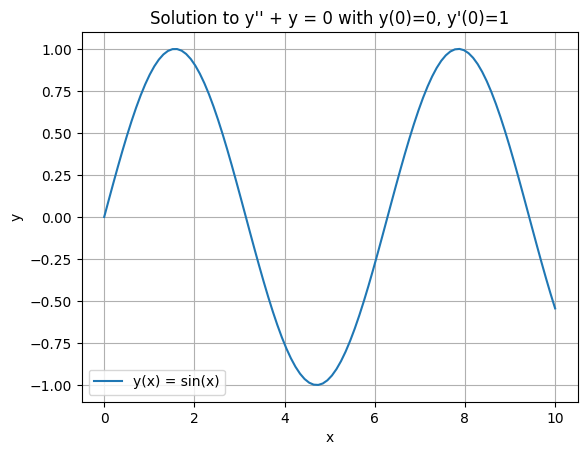

In [17]:
# Plotting the particular solution
f = sp.lambdify(x, sol2_particular.rhs, 'numpy')  # type: ignore
x_vals = np.linspace(0, 10, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='y(x) = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solution to y'' + y = 0 with y(0)=0, y'(0)=1")
plt.grid(True)
plt.legend()
plt.show()